In [1]:
import warnings
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np 
import pandas as pd
import re
import nltk
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline    
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score
from matplotlib.colors import ListedColormap
from sklearn.metrics import precision_score, recall_score, plot_confusion_matrix, classification_report, accuracy_score, f1_score
from sklearn import metrics

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\aksha\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\aksha\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\aksha\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [2]:
data = pd.read_excel(r'C:\Users\aksha\Downloads\spam.xlsx')
data.head()

,Type,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [3]:
X=data

In [4]:
X.describe()

,Type,Message
count,5572,5572
unique,2,5169
top,ham,"Sorry, I'll call later"
freq,4825,30


In [5]:
#Add feature: length of message
X['Message'] = X['Message'].apply(str)
X['length'] = X['Message'].apply(len)

In [6]:
X['Btype'] = X['Type'].map( {'spam': 1, 'ham': 0} ).astype(int)
X.head(15)

,Type,Message,length,Btype
0,ham,"Go until jurong point, crazy.. Available only ...",111,0
1,ham,Ok lar... Joking wif u oni...,29,0
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155,1
3,ham,U dun say so early hor... U c already then say...,49,0
4,ham,"Nah I don't think he goes to usf, he lives aro...",61,0
5,spam,FreeMsg Hey there darling it's been 3 week's n...,148,1
6,ham,Even my brother is not like to speak with me. ...,77,0
7,ham,As per your request 'Melle Melle (Oru Minnamin...,160,0
8,spam,WINNER!! As a valued network customer you have...,158,1
9,spam,Had your mobile 11 months or more? U R entitle...,154,1


In [7]:
X["No_of_Words"]=X.apply(lambda row: nltk.word_tokenize(row["Message"]), axis=1).apply(len)
X["No_of_sentence"]=X.apply(lambda row: nltk.sent_tokenize(row["Message"]), axis=1).apply(len)

X.describe().T

,count,mean,std,min,25%,50%,75%,max
length,5572.0,80.120962,59.693615,2.0,36.0,61.0,121.0,910.0
Btype,5572.0,0.134063,0.340751,0.0,0.0,0.0,0.0,1.0
No_of_Words,5572.0,18.698492,13.737477,1.0,9.0,15.0,27.0,220.0
No_of_sentence,5572.0,1.991565,1.501427,1.0,1.0,1.5,2.0,38.0


In [8]:
# Defining a function to clean up the text
def Clean(X):
    sms = re.sub('[^a-zA-Z]', ' ', X) #Replacing all non-alphabetic characters with a space
    sms = sms.lower() #converting to lowecase
    sms = sms.split()
    sms = ' '.join(sms)
    return sms

X["Cleaned"] = X["Message"].apply(Clean)

#Lets have a look at a sample of texts after cleaning
print(" Head(10) of the dataset after cleaning:",*X["Cleaned"][:10], sep = "\n")

 Head(10) of the dataset after cleaning:
go until jurong point crazy available only in bugis n great world la e buffet cine there got amore wat
ok lar joking wif u oni
free entry in a wkly comp to win fa cup final tkts st may text fa to to receive entry question std txt rate t c s apply over s
u dun say so early hor u c already then say
nah i don t think he goes to usf he lives around here though
freemsg hey there darling it s been week s now and no word back i d like some fun you up for it still tb ok xxx std chgs to send to rcv
even my brother is not like to speak with me they treat me like aids patent
as per your request melle melle oru minnaminunginte nurungu vettam has been set as your callertune for all callers press to copy your friends callertune
winner as a valued network customer you have been selected to receivea prize reward to claim call claim code kl valid hours only
had your mobile months or more u r entitled to update to the latest colour mobiles with camera for free ca

In [9]:
#Tokenization

X["Tokenized"]=X.apply(lambda row: nltk.word_tokenize(row["Cleaned"]), axis=1)

X.head(10)

,Type,Message,length,Btype,No_of_Words,No_of_sentence,Cleaned,Tokenized
0,ham,"Go until jurong point, crazy.. Available only ...",111,0,24,2,go until jurong point crazy available only in ...,"[go, until, jurong, point, crazy, available, o..."
1,ham,Ok lar... Joking wif u oni...,29,0,8,2,ok lar joking wif u oni,"[ok, lar, joking, wif, u, oni]"
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155,1,37,2,free entry in a wkly comp to win fa cup final ...,"[free, entry, in, a, wkly, comp, to, win, fa, ..."
3,ham,U dun say so early hor... U c already then say...,49,0,13,1,u dun say so early hor u c already then say,"[u, dun, say, so, early, hor, u, c, already, t..."
4,ham,"Nah I don't think he goes to usf, he lives aro...",61,0,15,1,nah i don t think he goes to usf he lives arou...,"[nah, i, don, t, think, he, goes, to, usf, he,..."
5,spam,FreeMsg Hey there darling it's been 3 week's n...,148,1,39,4,freemsg hey there darling it s been week s now...,"[freemsg, hey, there, darling, it, s, been, we..."
6,ham,Even my brother is not like to speak with me. ...,77,0,18,2,even my brother is not like to speak with me t...,"[even, my, brother, is, not, like, to, speak, ..."
7,ham,As per your request 'Melle Melle (Oru Minnamin...,160,0,31,2,as per your request melle melle oru minnaminun...,"[as, per, your, request, melle, melle, oru, mi..."
8,spam,WINNER!! As a valued network customer you have...,158,1,32,5,winner as a valued network customer you have b...,"[winner, as, a, valued, network, customer, you..."
9,spam,Had your mobile 11 months or more? U R entitle...,154,1,31,3,had your mobile months or more u r entitled to...,"[had, your, mobile, months, or, more, u, r, en..."


In [10]:
# Removing the stopwords function
def Clean2(text):
    stop_words = set(stopwords.words("english"))
    filtered_text = [word for word in text if word not in stop_words]
    return filtered_text

X["stopwordsremoved"] = X["Tokenized"].apply(Clean2)

In [11]:
X.head(10)

,Type,Message,length,Btype,No_of_Words,No_of_sentence,Cleaned,Tokenized,stopwordsremoved
0,ham,"Go until jurong point, crazy.. Available only ...",111,0,24,2,go until jurong point crazy available only in ...,"[go, until, jurong, point, crazy, available, o...","[go, jurong, point, crazy, available, bugis, n..."
1,ham,Ok lar... Joking wif u oni...,29,0,8,2,ok lar joking wif u oni,"[ok, lar, joking, wif, u, oni]","[ok, lar, joking, wif, u, oni]"
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155,1,37,2,free entry in a wkly comp to win fa cup final ...,"[free, entry, in, a, wkly, comp, to, win, fa, ...","[free, entry, wkly, comp, win, fa, cup, final,..."
3,ham,U dun say so early hor... U c already then say...,49,0,13,1,u dun say so early hor u c already then say,"[u, dun, say, so, early, hor, u, c, already, t...","[u, dun, say, early, hor, u, c, already, say]"
4,ham,"Nah I don't think he goes to usf, he lives aro...",61,0,15,1,nah i don t think he goes to usf he lives arou...,"[nah, i, don, t, think, he, goes, to, usf, he,...","[nah, think, goes, usf, lives, around, though]"
5,spam,FreeMsg Hey there darling it's been 3 week's n...,148,1,39,4,freemsg hey there darling it s been week s now...,"[freemsg, hey, there, darling, it, s, been, we...","[freemsg, hey, darling, week, word, back, like..."
6,ham,Even my brother is not like to speak with me. ...,77,0,18,2,even my brother is not like to speak with me t...,"[even, my, brother, is, not, like, to, speak, ...","[even, brother, like, speak, treat, like, aids..."
7,ham,As per your request 'Melle Melle (Oru Minnamin...,160,0,31,2,as per your request melle melle oru minnaminun...,"[as, per, your, request, melle, melle, oru, mi...","[per, request, melle, melle, oru, minnaminungi..."
8,spam,WINNER!! As a valued network customer you have...,158,1,32,5,winner as a valued network customer you have b...,"[winner, as, a, valued, network, customer, you...","[winner, valued, network, customer, selected, ..."
9,spam,Had your mobile 11 months or more? U R entitle...,154,1,31,3,had your mobile months or more u r entitled to...,"[had, your, mobile, months, or, more, u, r, en...","[mobile, months, u, r, entitled, update, lates..."


In [12]:
lemmatizer = WordNetLemmatizer()
# lemmatize string
def lemmatization(text):
    #word_tokens = word_tokenize(text)
    # provide context i.e. part-of-speech
    lem = [lemmatizer.lemmatize(word, pos ='v') for word in text]
    return lem

X["Lemmatized"] = X["stopwordsremoved"].apply(lemmatization)
X.head(10)

,Type,Message,length,Btype,No_of_Words,No_of_sentence,Cleaned,Tokenized,stopwordsremoved,Lemmatized
0,ham,"Go until jurong point, crazy.. Available only ...",111,0,24,2,go until jurong point crazy available only in ...,"[go, until, jurong, point, crazy, available, o...","[go, jurong, point, crazy, available, bugis, n...","[go, jurong, point, crazy, available, bugis, n..."
1,ham,Ok lar... Joking wif u oni...,29,0,8,2,ok lar joking wif u oni,"[ok, lar, joking, wif, u, oni]","[ok, lar, joking, wif, u, oni]","[ok, lar, joke, wif, u, oni]"
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155,1,37,2,free entry in a wkly comp to win fa cup final ...,"[free, entry, in, a, wkly, comp, to, win, fa, ...","[free, entry, wkly, comp, win, fa, cup, final,...","[free, entry, wkly, comp, win, fa, cup, final,..."
3,ham,U dun say so early hor... U c already then say...,49,0,13,1,u dun say so early hor u c already then say,"[u, dun, say, so, early, hor, u, c, already, t...","[u, dun, say, early, hor, u, c, already, say]","[u, dun, say, early, hor, u, c, already, say]"
4,ham,"Nah I don't think he goes to usf, he lives aro...",61,0,15,1,nah i don t think he goes to usf he lives arou...,"[nah, i, don, t, think, he, goes, to, usf, he,...","[nah, think, goes, usf, lives, around, though]","[nah, think, go, usf, live, around, though]"
5,spam,FreeMsg Hey there darling it's been 3 week's n...,148,1,39,4,freemsg hey there darling it s been week s now...,"[freemsg, hey, there, darling, it, s, been, we...","[freemsg, hey, darling, week, word, back, like...","[freemsg, hey, darling, week, word, back, like..."
6,ham,Even my brother is not like to speak with me. ...,77,0,18,2,even my brother is not like to speak with me t...,"[even, my, brother, is, not, like, to, speak, ...","[even, brother, like, speak, treat, like, aids...","[even, brother, like, speak, treat, like, aid,..."
7,ham,As per your request 'Melle Melle (Oru Minnamin...,160,0,31,2,as per your request melle melle oru minnaminun...,"[as, per, your, request, melle, melle, oru, mi...","[per, request, melle, melle, oru, minnaminungi...","[per, request, melle, melle, oru, minnaminungi..."
8,spam,WINNER!! As a valued network customer you have...,158,1,32,5,winner as a valued network customer you have b...,"[winner, as, a, valued, network, customer, you...","[winner, valued, network, customer, selected, ...","[winner, value, network, customer, select, rec..."
9,spam,Had your mobile 11 months or more? U R entitle...,154,1,31,3,had your mobile months or more u r entitled to...,"[had, your, mobile, months, or, more, u, r, en...","[mobile, months, u, r, entitled, update, lates...","[mobile, months, u, r, entitle, update, latest..."


Vectorization Experiments

In [13]:
#Creating a corpus of text feature to encode further into vectorized form
corpus= []
for i in data["Lemmatized"]:
    msg = ' '.join([row for row in i])
    corpus.append(msg)
    
corpus[:10]

['go jurong point crazy available bugis n great world la e buffet cine get amore wat',
 'ok lar joke wif u oni',
 'free entry wkly comp win fa cup final tkts st may text fa receive entry question std txt rate c apply',
 'u dun say early hor u c already say',
 'nah think go usf live around though',
 'freemsg hey darling week word back like fun still tb ok xxx std chgs send rcv',
 'even brother like speak treat like aid patent',
 'per request melle melle oru minnaminunginte nurungu vettam set callertune callers press copy friends callertune',
 'winner value network customer select receivea prize reward claim call claim code kl valid hours',
 'mobile months u r entitle update latest colour mobiles camera free call mobile update co free']

In [14]:
tfidf = TfidfVectorizer()
df = tfidf.fit_transform(corpus).toarray()
#Let's have a look at our feature 
df.dtype

dtype('float64')

In [15]:
label_encoder = LabelEncoder()
X["Type"] = label_encoder.fit_transform(X["Type"])

In [16]:
X.head()

,Type,Message,length,Btype,No_of_Words,No_of_sentence,Cleaned,Tokenized,stopwordsremoved,Lemmatized
0,0,"Go until jurong point, crazy.. Available only ...",111,0,24,2,go until jurong point crazy available only in ...,"[go, until, jurong, point, crazy, available, o...","[go, jurong, point, crazy, available, bugis, n...","[go, jurong, point, crazy, available, bugis, n..."
1,0,Ok lar... Joking wif u oni...,29,0,8,2,ok lar joking wif u oni,"[ok, lar, joking, wif, u, oni]","[ok, lar, joking, wif, u, oni]","[ok, lar, joke, wif, u, oni]"
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,1,37,2,free entry in a wkly comp to win fa cup final ...,"[free, entry, in, a, wkly, comp, to, win, fa, ...","[free, entry, wkly, comp, win, fa, cup, final,...","[free, entry, wkly, comp, win, fa, cup, final,..."
3,0,U dun say so early hor... U c already then say...,49,0,13,1,u dun say so early hor u c already then say,"[u, dun, say, so, early, hor, u, c, already, t...","[u, dun, say, early, hor, u, c, already, say]","[u, dun, say, early, hor, u, c, already, say]"
4,0,"Nah I don't think he goes to usf, he lives aro...",61,0,15,1,nah i don t think he goes to usf he lives arou...,"[nah, i, don, t, think, he, goes, to, usf, he,...","[nah, think, goes, usf, lives, around, though]","[nah, think, go, usf, live, around, though]"


In [17]:
#Modeling Prep

#Setting values for labels and feature as y and X(we already did X in vectorizing...)
y = X["Type"] 
# Splitting the testing and training sets
X_train, X_test, y_train, y_test = train_test_split(df, y, test_size=0.27, random_state=42)

In [18]:
#Testing on the following classifiers
classifiers = [MultinomialNB(), 
               RandomForestClassifier(),
               LinearSVC(), 
               SVC()]
for cls in classifiers:
    cls.fit(X_train, y_train)

# Dictionary of pipelines and model types for ease of reference
piped = {0: "NaiveBayes", 1: "RandomForest", 2: "LinearSVC",3: "SVC"}

In [19]:
# Crossvalidation 
for i, model in enumerate(classifiers):
    cv_score = cross_val_score(model, X_train,y_train,scoring="accuracy", cv=10)
    print("%s: %f " % (piped[i], cv_score.mean()))

NaiveBayes: 0.966311 
RandomForest: 0.976639 
LinearSVC: 0.981064 
SVC: 0.974919 


In [20]:
#Model Evaluation

#listing metrics
precision =[]
recall =[]
f1_score = []
trainset_accuracy = []
testset_accuracy = []

for i in classifiers:
    pred_train = i.predict(X_train)
    pred_test = i.predict(X_test)
    prec = metrics.precision_score(y_test, pred_test)
    recal = metrics.recall_score(y_test, pred_test)
    f1_s = metrics.f1_score(y_test, pred_test)
    train_accuracy = model.score(X_train,y_train)
    test_accuracy = model.score(X_test,y_test)
  
    #Appending scores
    precision.append(prec)
    recall.append(recal)
    f1_score.append(f1_s)
    trainset_accuracy.append(train_accuracy)
    testset_accuracy.append(test_accuracy)
    
    
final = {'Precision':precision,
'Recall':recall,
'F1score':f1_score,
'Accuracy on Testset':testset_accuracy,
'Accuracy on Trainset':trainset_accuracy}
# Creates pandas DataFrame.
Result = pd.DataFrame(final, index =["NaiveBayes", "RandomForest", "LinearSVC","SVC"])
Result.style.background_gradient(cmap='coolwarm')

,Precision,Recall,F1score,Accuracy on Testset,Accuracy on Trainset
NaiveBayes,0.993151,0.714286,0.830946,0.974751,0.997787
RandomForest,1.000000,0.827586,0.905660,0.974751,0.997787
LinearSVC,0.983051,0.857143,0.915789,0.974751,0.997787
SVC,0.988166,0.822660,0.897849,0.974751,0.997787


C:\Users\aksha\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
C:\Users\aksha\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
C:\Users\aksha\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods:

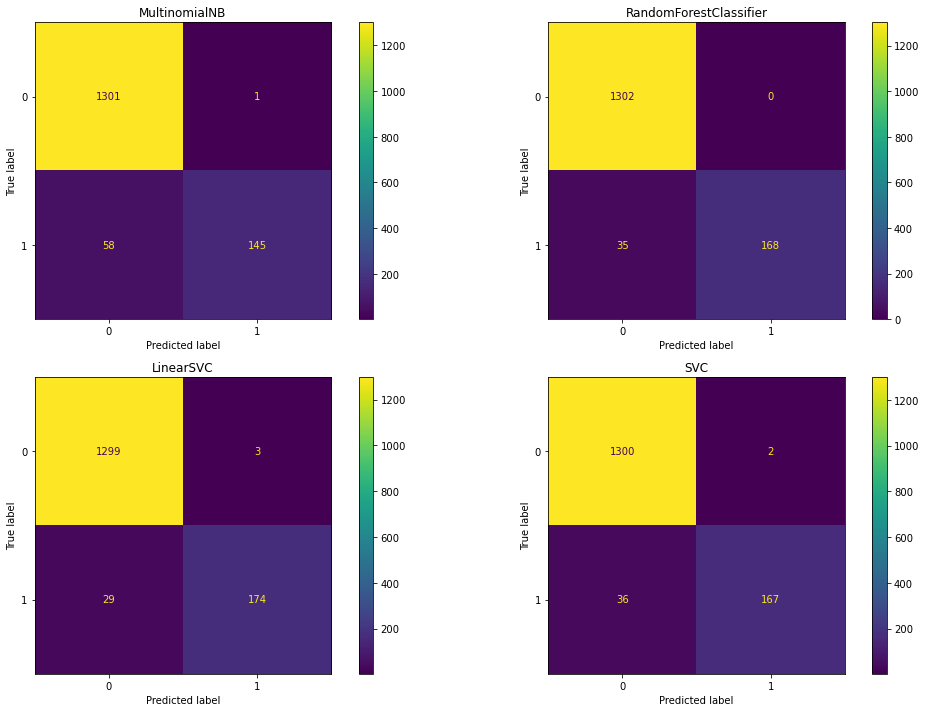

In [21]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(15,10))

for cls, ax in zip(classifiers, axes.flatten()):
    plot_confusion_matrix(cls, 
                          X_test, 
                          y_test, 
                          ax=ax,   
                          )
    ax.title.set_text(type(cls).__name__)
plt.tight_layout()  
plt.show()